# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Statistics Session-4 <br> Central Limit Theorem and Confidence Intervals <br> (29 Jun 22)</p>

## **Pre-Class**

### Importing libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### t-Distribution

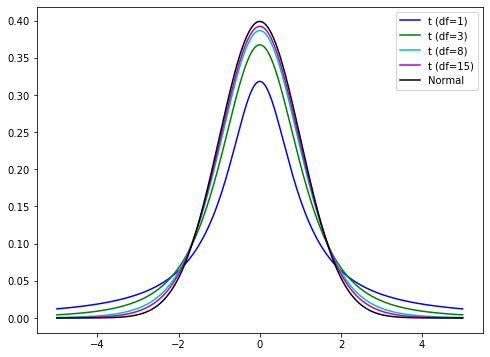

In [47]:
plt.figure(figsize=(8,6))
xs = np.linspace(-5,5,1000)

plt.plot(xs, stats.t.pdf(xs, 1), "b", label="t (df=1)")
plt.plot(xs, stats.t.pdf(xs, 3), "g", label="t (df=3)")
plt.plot(xs, stats.t.pdf(xs, 8), "c", label="t (df=8)")
plt.plot(xs, stats.t.pdf(xs, 15), "m", label="t (df=15)")
plt.plot(xs, stats.norm.pdf(xs), "k", label="Normal")
plt.legend()
plt.show();

### Confidence Interval for Population Mean using SciPy

#### Large Sample or Population Variance Known (using z-score)

Define a sample dataset (exam grades for a class of 40 students):

In [48]:
import numpy as np
from scipy import stats
np.random.seed(42)
grades = np.random.randint(100, size = 40)
print(grades)

[51 92 14 71 60 20 82 86 74 74 87 99 23  2 21 52  1 87 29 37  1 63 59 20
 32 75 57 21 88 48 90 58 41 91 59 79 14 61 61 46]


Calculate the sample mean:

In [49]:
xbar = np.mean(grades)
print(xbar)

53.15


Calculate standard error of the mean:

In [50]:
n = len(grades)            #sample size
sigma = 28                 #population standard deviation (from past experiences)
sem = sigma / np.sqrt(n)   #standard error of the mean
print(sem)

4.427188724235731


 Calculate 95% Confidence Interval around the mean by using scipy.stats:

In [51]:
stats.norm.interval(alpha=0.95, loc=xbar, scale=sem)

(44.47286954773614, 61.82713045226386)

#### Population Variance Unknown (using t-score)

Define a sample dataset (exam grades for a class of 20 students):

In [52]:
np.random.seed(101)
grades = np.random.randint(100, size = 20)
print(grades)

[95 11 81 70 63 87 75  9 77 40  4 63 40 60 92 64  5 12 93 40]


Calculate 95% Confidence Interval around the mean by using scipy.stats:

In [53]:
stats.t.interval(alpha=0.95,              #confidence level
                 df=np.size(grades)-1,    #degrees of freedom
                 loc=np.mean(grades),     #sample mean
                 scale=stats.sem(grades))  #standard error of the mean

(39.205382746648176, 68.89461725335181)

## **In-Class**

### Confidence Intervals Using the Normal Distribution & t Distribution

In [54]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [55]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [57]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


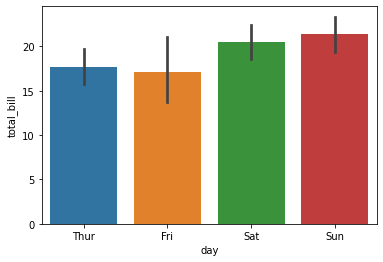

In [58]:
sns.barplot(x="day", y="total_bill", data = tips, ci=95);

**Friday**

In [59]:
tipsFri = tips[tips["day"] == "Fri"]
tipsFri.head()

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2


In [60]:
xbar = tipsFri.total_bill.mean()
xbar

17.151578947368417

In [61]:
tipsFri.shape

(19, 7)

In [62]:
sem = tipsFri.total_bill.sem()
sem

1.904760773479416

In [63]:
#sem manual calculation
tipsFri.total_bill.std() / np.sqrt(len(tipsFri))

1.904760773479416

In [64]:
std = tipsFri.total_bill.std()
std

8.302659723217143

In [65]:
sem = std / np.sqrt(len(tipsFri))
sem

1.904760773479416

In [66]:
# margin of error
moe = 1.96 * sem
moe

3.7333311160196554

In [67]:
# upper confidence limit
upper = xbar + moe
upper

20.884910063388073

In [68]:
# lower confidence limit
lower = xbar - moe
lower

13.418247831348761

In [69]:
lower, upper

(13.418247831348761, 20.884910063388073)

**z distribution - CL**

In [70]:
stats.norm.interval(0.95, loc=tipsFri.total_bill.mean(), scale=tipsFri.total_bill.sem())

(13.418316432184106, 20.88484146255273)

**t distribution - CL**

In [71]:
stats.t.interval(0.95, df=len(tipsFri)-1, loc=tipsFri.total_bill.mean(), scale=tipsFri.total_bill.sem())

(13.149825056979093, 21.15333283775774)

**Sunday**

In [72]:
alpha = 0.05

In [73]:
tipsSun = tips[tips["day"] == "Sun"]
tipsSun

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [74]:
len(tipsSun)

76

In [75]:
tipsSun.shape

(76, 7)

**t distribution - CL**

In [76]:
stats.t.interval(0.95, df=len(tipsSun)-1, loc=tipsSun.total_bill.mean(), scale=tipsSun.total_bill.sem())

(19.391773706521036, 23.42822629347897)

In [77]:
xbar = tipsSun.total_bill.mean()
xbar

21.410000000000004

In [78]:
std = tipsSun.total_bill.std()
std

8.832121828869889

In [79]:
sem = std / np.sqrt(len(tipsSun))
sem

1.0131138555021968

In [80]:
print(alpha)

0.05


In [81]:
1-alpha/2

0.975

In [82]:
stats.t.ppf((1-alpha/2), len(tipsSun)-1)

1.9921021536898653

In [83]:
alpha/2

0.025

In [84]:
stats.t.ppf((alpha/2), len(tipsSun)-1)

-1.9921021536898658

In [85]:
moe = 1.96 * sem
moe

1.9857031567843058

getting t value from probability (ppf)

In [86]:
stats.t.ppf(0.975, 75)

1.9921021536898653

getting z value from probability (ppf)

In [87]:
stats.norm.ppf(0.975)

1.959963984540054

In [88]:
stats.t.cdf(-0.7745966, 14)

0.2257313120658352